1.MSSV: 20520435

2.Họ tên: Nguyễn Duy Đạt

3.Bài tập: 3

4.Ngày thực hiện: 24/09/2022

# Bước 1: Cài đặt các thư viện cần thiết

In [ ]:
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install folium

In [ ]:
!pip install rtree
!pip install pygeos
!pip install geojson
!pip install geopandas

In [ ]:
import numpy as np
import geopandas as gpd
import folium
import math
import matplotlib.pyplot as plt
from geopandas import datasets, GeoDataFrame, read_file
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Bước 2: clone data từ https://github.com/CityScope/CSL_HCMC

In [ ]:
# Đã clone về drive cá nhân
!git clone https://github.com/CityScope/CSL_HCMC.git

# Bước 3: Load ranh giới quận huyện và dân số quận huyện từ: Data\GIS\Population\population_HCMC\population_shapefile\Population_District_Le vel.shp

In [ ]:
%cd "/content/drive/MyDrive/CS116 /CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile"

/content/drive/MyDrive/CS116 /CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile


In [ ]:
data_district = gpd.read_file("Population_District_Level.shp")
data_district

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,...,24749.600,25589.300,25962.100,25098.200,27022.100,27377.900,18486.8000,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,...,38897.100,39227.200,39326.300,39862.100,40221.700,40422.900,38652.5000,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,...,44428.400,44466.500,44789.300,44686.400,44750.600,44008.400,41958.7000,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,...,36105.700,37261.600,36010.200,36256.900,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,...,7563.590,7963.850,8418.120,8798.840,9006.200,9282.350,10216.5000,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."
5,District 10,771,District,230345.0,232450.0,236336.0,237086.0,239180.0,238755.0,238558.0,...,41535.600,41902.500,41828.000,41793.500,42015.600,42278.600,41138.5000,10478.512538,5.707881e+06,"POLYGON ((682507.505 1189929.778, 682485.431 1..."
6,District 11,772,District,226854.0,232536.0,236443.0,233499.0,227860.0,228030.0,230596.0,...,45502.900,44404.000,44437.100,44937.200,45657.200,46206.600,40897.6000,10833.546511,5.131351e+06,"POLYGON ((681349.265 1190928.179, 681382.887 1..."
7,Phu Nhuan,768,District,174535.0,175175.0,177242.0,179917.0,180456.0,182821.0,182477.0,...,36793.300,36903.500,37387.100,37316.800,37174.300,37482.600,33530.3000,12392.134315,4.889837e+06,"POLYGON ((682877.988 1195927.612, 682969.684 1..."
8,Tan Binh,766,District,421724.0,430436.0,434298.0,440351.0,443061.0,448989.0,455029.0,...,19627.100,19747.900,20012.100,20281.400,20927.500,20979.800,21162.2000,23807.894025,2.243513e+07,"POLYGON ((680274.980 1198401.860, 680578.965 1..."
9,Binh Thanh,765,District,457362.0,470054.0,484135.0,484423.0,482833.0,485772.0,487985.0,...,23307.600,23231.100,23372.500,23478.900,23559.400,23605.600,24016.8000,29544.712130,2.078389e+07,"POLYGON ((684986.154 1194412.964, 684987.226 1..."


# Bước 4: Load dữ liệu click của người dùng

In [ ]:
%cd "/content/drive/MyDrive/CS116 "

/content/drive/MyDrive/CS116 


In [ ]:
data_click = gpd.read_file("click_data.json")
data_click = GeoDataFrame(data_click)
data_click

,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)
...,...,...
83670,1,POINT (106.65664 10.84339)
83671,1,POINT (106.75180 10.85276)
83672,1,POINT (106.73189 10.73154)
83673,1,POINT (106.67640 10.82388)


# Bước 5: Lọc ra 10 quận huyện có tốc độ tăng dân số nhanh nhất (Pop2019/Pop2017)

In [ ]:
data_district['Speed_of_Growth'] = data_district.Pop_2019 / data_district.Pop_2017
district = data_district.sort_values(by='Speed_of_Growth', ascending=False)
top_district = district
top_district = top_district[['Dist_Name', 'Speed_of_Growth']]
top_district.head(10)

,Dist_Name,Speed_of_Growth
16,District 9,1.277619
23,Hoc Mon,1.215639
18,Nha Be,1.162071
22,District 12,1.129460
17,District 2,1.113104
13,Cu Chi,1.103646
4,District 7,1.100641
15,Thu Duc,1.092283
14,Binh Chanh,1.080576
12,Binh Tan,1.075143


# Bước 6: Dùng spatial join (from geopandas.tools import sjoin) để lọc ra các điểm click của người dùng trong 5 quận/huyện hot nhất

In [ ]:
from geopandas.tools import sjoin

In [ ]:
data_district['Speed_of_Growth'] = data_district.Pop_2019 / data_district.Pop_2017
district = data_district.sort_values(by='Speed_of_Growth', ascending=False)
top_district = district

In [ ]:
top_district = top_district.to_crs(epsg=4326)
print(top_district.crs)
top_district.head()

epsg:4326


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,...,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,Speed_of_Growth
16,District 9,763,District,256257.0,263486.0,271537.0,276432.0,284473.0,284990.0,290620.0,...,2489.70,2494.23,2543.50,2592.32,2719.58,3474.59,53139.220230,1.142649e+08,"POLYGON ((106.84015 10.89893, 106.84048 10.897...",1.277619
23,Hoc Mon,784,District,349065.0,358640.0,366502.0,396763.0,408683.0,414795.0,422471.0,...,3743.18,3799.16,3869.46,3977.58,4085.48,4966.47,65955.793966,1.091744e+08,"POLYGON ((106.58361 10.92869, 106.58391 10.928...",1.215639
18,Nha Be,786,District,101074.0,103793.0,110958.0,119416.0,126062.0,132034.0,139225.0,...,1254.48,1313.90,1385.46,1552.41,1771.22,2058.29,67540.905029,1.004901e+08,"POLYGON ((106.72315 10.72162, 106.72428 10.721...",1.162071
22,District 12,761,District,405360.0,427083.0,455881.0,475824.0,489511.0,499569.0,510326.0,...,9275.44,9466.02,9669.85,9968.06,10403.90,11750.80,47703.394094,5.277342e+07,"POLYGON ((106.69433 10.89842, 106.69446 10.897...",1.129460
17,District 2,769,District,147490.0,140621.0,137749.0,134131.0,140436.0,140288.0,147168.0,...,2812.21,2809.25,2947.02,3080.46,3243.16,3609.98,39592.970451,4.993869e+07,"POLYGON ((106.74241 10.80855, 106.74442 10.808...",1.113104


In [ ]:
data_click = data_click.to_crs(epsg=4326)
print(data_click.crs)
data_click.head()

epsg:4326


,dbh,geometry
0,1,POINT (106.71136 10.85113)
1,1,POINT (106.71695 10.74449)
2,1,POINT (106.66315 10.83289)
3,1,POINT (106.66267 10.83339)
4,1,POINT (106.65977 10.83729)


In [ ]:
point_to_District = sjoin(data_click, top_district)
point_to_District

,dbh,geometry,index_right,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,...,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,Speed_of_Growth
0,1,POINT (106.71136 10.85113),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.800,10630.200,10842.20,11065.00,11245.900,11362.300,12410.9000,52828.501430,4.775581e+07,1.092283
5,1,POINT (106.75131 10.85530),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.800,10630.200,10842.20,11065.00,11245.900,11362.300,12410.9000,52828.501430,4.775581e+07,1.092283
11,1,POINT (106.75553 10.84865),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.800,10630.200,10842.20,11065.00,11245.900,11362.300,12410.9000,52828.501430,4.775581e+07,1.092283
12,1,POINT (106.75589 10.84450),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.800,10630.200,10842.20,11065.00,11245.900,11362.300,12410.9000,52828.501430,4.775581e+07,1.092283
13,1,POINT (106.75193 10.85237),15,Thu Duc,762,District,442177.0,455899.0,478900.0,500850.0,...,10487.800,10630.200,10842.20,11065.00,11245.900,11362.300,12410.9000,52828.501430,4.775581e+07,1.092283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25540,1,POINT (106.63954 10.74860),3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,...,36105.700,37261.600,36010.20,36256.90,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,0.888886
33392,1,POINT (106.64180 10.74428),3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,...,36105.700,37261.600,36010.20,36256.90,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,0.888886
39145,1,POINT (106.64165 10.74436),3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,...,36105.700,37261.600,36010.20,36256.90,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,0.888886
83226,1,POINT (106.64188 10.74416),3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,...,36105.700,37261.600,36010.20,36256.90,36508.500,36790.600,32702.7000,13077.365262,7.140945e+06,0.888886


In [ ]:
point_in_district = [point_to_District[point_to_District.Dist_Name == dist_name][['geometry', 'Dist_Name']] for dist_name in top_district.Dist_Name]
for i in range(0, 5):
  print(point_in_district[i])
  print("-------------------------------------------------")

                         geometry   Dist_Name
222    POINT (106.76471 10.82926)  District 9
429    POINT (106.79251 10.78538)  District 9
1316   POINT (106.81852 10.78415)  District 9
1381   POINT (106.76463 10.82930)  District 9
2129   POINT (106.81964 10.78909)  District 9
...                           ...         ...
81983  POINT (106.84658 10.87865)  District 9
82069  POINT (106.78265 10.82731)  District 9
82657  POINT (106.80625 10.84451)  District 9
83095  POINT (106.83235 10.84348)  District 9
83372  POINT (106.76182 10.82430)  District 9

[133 rows x 2 columns]
-------------------------------------------------
                         geometry Dist_Name
126    POINT (106.57481 10.90807)   Hoc Mon
525    POINT (106.57148 10.87880)   Hoc Mon
7264   POINT (106.65113 10.89893)   Hoc Mon
7964   POINT (106.60845 10.83907)   Hoc Mon
12190  POINT (106.61414 10.86641)   Hoc Mon
17846  POINT (106.60935 10.87096)   Hoc Mon
18570  POINT (106.53204 10.90747)   Hoc Mon
18582  POINT (106.5939

# Bước 7: chạy KMean cho top 10 quận huyện này. Lấy K = 20


In [ ]:
Kmeans = KMeans(n_clusters=20)
scaler = MinMaxScaler()

In [ ]:
for i in range(10):
  # Normalize
  X = np.array(point_in_district[i].geometry.x).reshape((-1, 1)) 
  Y = np.array(point_in_district[i].geometry.y).reshape((-1, 1)) 

  X = scaler.fit_transform(X)
  Y = scaler.fit_transform(Y)

  # Clustering
  points = np.hstack((X,Y))

  labels = Kmeans.fit_predict(points)
  point_in_district[i]['label'] = labels

In [ ]:
for i in range(0, 10):
  print(point_in_district[i])
  print("-------------------------------------------------")

                         geometry   Dist_Name  label
222    POINT (106.76471 10.82926)  District 9      9
429    POINT (106.79251 10.78538)  District 9      5
1316   POINT (106.81852 10.78415)  District 9     11
1381   POINT (106.76463 10.82930)  District 9      9
2129   POINT (106.81964 10.78909)  District 9     11
...                           ...         ...    ...
81983  POINT (106.84658 10.87865)  District 9     17
82069  POINT (106.78265 10.82731)  District 9      2
82657  POINT (106.80625 10.84451)  District 9     18
83095  POINT (106.83235 10.84348)  District 9      6
83372  POINT (106.76182 10.82430)  District 9      9

[133 rows x 3 columns]
-------------------------------------------------
                         geometry Dist_Name  label
126    POINT (106.57481 10.90807)   Hoc Mon      8
525    POINT (106.57148 10.87880)   Hoc Mon     10
7264   POINT (106.65113 10.89893)   Hoc Mon      6
7964   POINT (106.60845 10.83907)   Hoc Mon     12
12190  POINT (106.61414 10.86641)  

# Bước 8: Lưu cụm điểm nhiều nhất của mỗi quận huyện

In [ ]:
top_clusters = []
for i in range(10):
  top_clusters.append(point_in_district[i][point_in_district[i]['label'] == point_in_district[i]['label'].value_counts(ascending=False).index[0]])

print(top_clusters)
print("--------------------------------------------------------------")

[                         geometry   Dist_Name  label
3321   POINT (106.81407 10.85064)  District 9      3
10041  POINT (106.81472 10.85354)  District 9      3
11864  POINT (106.81416 10.85071)  District 9      3
14717  POINT (106.81414 10.85450)  District 9      3
17351  POINT (106.81551 10.85723)  District 9      3
17761  POINT (106.81486 10.85358)  District 9      3
19829  POINT (106.81464 10.85036)  District 9      3
26007  POINT (106.81459 10.85042)  District 9      3
29336  POINT (106.81418 10.85077)  District 9      3
30875  POINT (106.81505 10.85354)  District 9      3
31592  POINT (106.81545 10.85731)  District 9      3
43878  POINT (106.81412 10.85435)  District 9      3
52103  POINT (106.81532 10.85356)  District 9      3
64049  POINT (106.81486 10.85358)  District 9      3
70147  POINT (106.81409 10.85046)  District 9      3
74282  POINT (106.81472 10.85354)  District 9      3
74935  POINT (106.81406 10.85042)  District 9      3
75855  POINT (106.81270 10.84711)  District 9

# Bước 9: show lên bản đồ các cụm đông nhất theo từng quận huyện theo dạng HEATMAP


In [ ]:
from folium import plugins

In [ ]:
map = folium.Map(location = [10.81822, 106.77435], tiles='OpenStreetMap' , zoom_start = 10)

In [ ]:
for i in range(10):
  data = [[point.xy[1][0], point.xy[0][0]] for point in top_clusters[i].geometry]
  plugins.HeatMap(data).add_to(map)

In [ ]:
map

# Bước 10: Lưu heatmap xuống file png


-Thực thi trên PC với file .py

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary

options = Options()
options.binary = FirefoxBinary(r'C:\Program Files\Mozilla Firefox\firefox.exe')

driver = webdriver.Firefox(executable_path=r'D:\cs116\geckodriver.exe', options=options)
# download gecko driver for firefox from here - https://github.com/mozilla/geckodriver/releases

# use selenium to save the html as png image
driver.get("file:///D:/cs116/testmap.html")
# wait for 5 seconds for the maps and other assets to be loaded in the browser
time.sleep(5)
driver.save_screenshot('output.png')
driver.quit()

-Kết quả

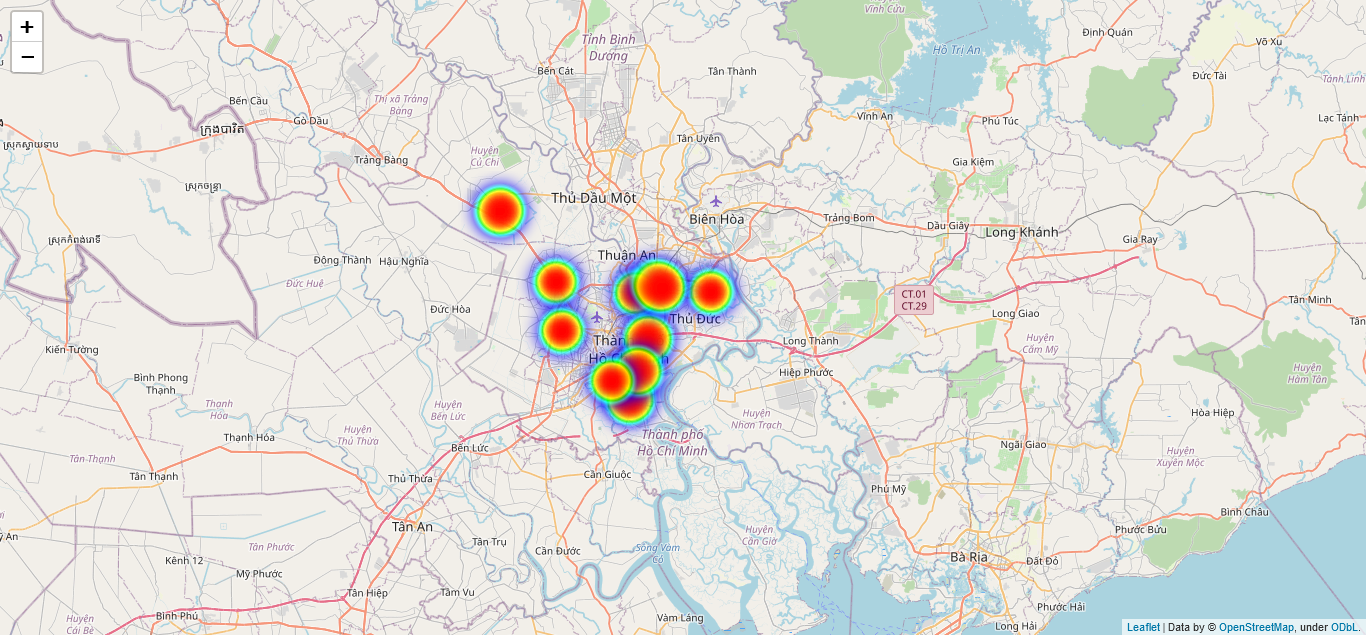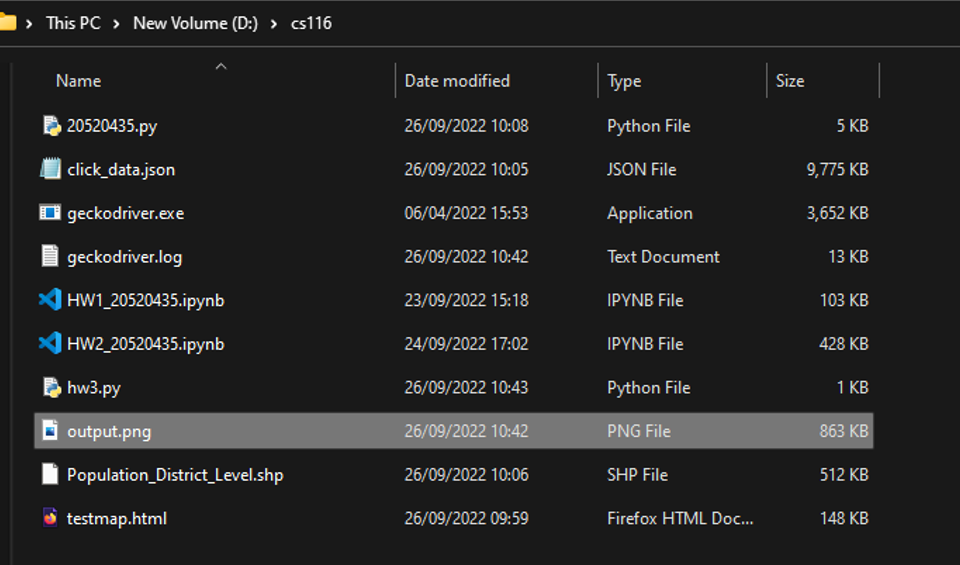